# Version 1.0
# 30/11/21
Machine Learning Group Project


Adapted from file "ImportingDataV0.1.py"

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", size=14)

# Checking csv and titles by importing first row of a file

In [34]:
file_dir="../SpotifyData/"
file_name="ClassicRock_3Ho3iO0iJykgEQNbjB2sic.csv"

test_csv = pd.read_csv(file_dir+file_name, index_col=0, nrows=1) 
display(test_csv)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name
0,0.31,0.7,9,-5.678,1,0.047,0.011,0.00965,0.0828,0.763,188.386,audio_features,08mG3Y1vljYA6bvDt4Wqkj,spotify:track:08mG3Y1vljYA6bvDt4Wqkj,https://api.spotify.com/v1/tracks/08mG3Y1vljYA...,https://api.spotify.com/v1/audio-analysis/08mG...,255493,4,Back In Black


# Compiling Data
Next step is to make a single dataframe holding the data from all source files

In [48]:
file_dir="../SpotifyData/"

file_names= ["JazzClassic_37i9dQZF1DXbITWG1ZJKYt.csv",\
             "CountryHits_1mJhSx6aYQmINsZ8dG4gzU.csv",\
             "ClassicalStudy_6wObnEPQ63a4kei1sEcMdH.csv",\
             "HipHopClassics_5CRJExGSQFYXem2hT5GFkd.csv",\
            "ClassicRock_3Ho3iO0iJykgEQNbjB2sic.csv",\
             "KpopClassics_0jB4ANR4ox65etDMnxvGLp.csv",\
             "HeavyMetalClassics_27gN69ebwiJRtXEboL12Ih.csv",\
             "DanceHits_5oKz4DsTP8zbL97UIPbqp4.csv"]

file_nrows=[ 200, 205, 227,229, 299, 322, 385, 434]

# Most convenient to set up dataframe with initial file, then systematically loop through the others
#Sticking with just the basic parameters for now
parameter_columns = [1,2,5,6,7,8,9,10]
# tempo_column=11
# mode 5



#1 indexing here more natural
playlist_number=1
data = pd.read_csv(file_dir+file_names[playlist_number-1], usecols=parameter_columns, nrows=file_nrows[0])

playlist_numbers = playlist_number*np.ones(len(data))
data["playlist_number"]=playlist_numbers #Now has extra playlist column



# Now looping through the remaining filenames
for playlist_number in range(2,len(file_names)+1):
    # dtmp := Temporary dataframe, will append to df.data once data filtered and prepped
    dtmp= pd.read_csv(file_dir+file_names[playlist_number-1], usecols=parameter_columns, \
                      nrows=file_nrows[playlist_number-1])

    playlist_numbers = playlist_number*np.ones(len(dtmp)) # array of playlist_number
    dtmp["playlist_number"]=playlist_numbers #Now has extra playlist column
    data=data.append(dtmp, ignore_index=True) #Append back to main df.data
    
display(data.head())

print("Removing n duplicates = ", data.duplicated().sum()) #prints number of duplicates
data = data.drop_duplicates() 


X = data.loc[:,"danceability":"liveness"]#.values
#X = data.loc[:,"danceability":"tempo"]
Y = data.loc[:,"playlist_number"]


X.reset_index(drop=True, inplace=True)
Y.reset_index(drop=True, inplace=True)
X=np.array(X);Y=np.array(Y)
classes=np.array([1,2,3,4,5,6,7,8])

,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,playlist_number
0,0.639,0.2690,1,0.0698,0.982,0.120000,0.141,0.539,1.0
1,0.419,0.0284,1,0.0357,0.987,0.586000,0.105,0.121,1.0
2,0.573,0.2470,0,0.0627,0.713,0.000056,0.103,0.604,1.0
3,0.593,0.1030,1,0.0810,0.986,0.600000,0.120,0.443,1.0
4,0.450,0.0288,1,0.0467,0.994,0.895000,0.118,0.358,1.0


Removing n duplicates =  24


In [49]:
print(X)
print(X.shape)
print(np.array(X)[0])

[[6.39e-01 2.69e-01 1.00e+00 ... 9.82e-01 1.20e-01 1.41e-01]
 [4.19e-01 2.84e-02 1.00e+00 ... 9.87e-01 5.86e-01 1.05e-01]
 [5.73e-01 2.47e-01 0.00e+00 ... 7.13e-01 5.64e-05 1.03e-01]
 ...
 [5.28e-01 9.65e-01 0.00e+00 ... 1.41e-01 9.85e-01 7.97e-02]
 [4.58e-01 6.96e-01 1.00e+00 ... 2.85e-01 0.00e+00 1.23e-01]
 [3.11e-01 8.57e-01 0.00e+00 ... 1.37e-03 8.05e-01 3.07e-01]]
(2276, 7)
[0.639  0.269  1.     0.0698 0.982  0.12   0.141 ]


# Training?
Any pre-processing necessary for:
- Repeat songs
- Incomplete data


Note: I have only chosen 200 songs from each playlist, some do contain more songs


# kNN Model

In [50]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3, weights="uniform").fit(X,Y)
ypred = model.predict(X)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(ypred,Y))

[[178   9   5   1  15   0   4   1]
 [  2 143   0   1  50  24  24  40]
 [ 17   0 222   0   0   0   0   0]
 [  0   0   0 193  12  27   1  31]
 [  3  14   0   2 165  22  46  39]
 [  0   4   0  15  10 210   9  42]
 [  0   7   0   0  34   3 291   9]
 [  0  10   0  13  12  35  10 271]]


# Precision for kNN weighted by distance

[0.5443830730672836, 0.5500910931174089, 0.5565317139001349, 0.5618418642760747]
[0.008911873902437207, 0.017063739546348256, 0.01933040918044488, 0.020648984506277546]


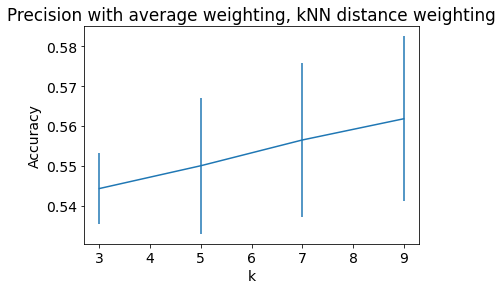

In [51]:
#X = data.loc[:,"danceability":"liveness"].values
#Y = data.loc[:,"playlist_number"]

n_splits = 5
ks=[3,5,7,9]

from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold    
from sklearn.metrics import precision_score, accuracy_score
#from sklearn.metrics import 
kf = KFold(n_splits=n_splits, shuffle=True) #important to shuffle for our ordered data

tmp=[]
precision=[]
precision_err=[]
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k, weights="distance")
    for train, test in kf.split(X):
        model.fit(X[train],Y[train])
        ypred = model.predict(X[test])
        #print(confusion_matrix(ypred,Y[test]))

        #tmp.append( precision_score(Y[test], ypred, average="weighted") )
        tmp.append( accuracy_score(Y[test], ypred) )
        ## average = {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}

    precision.append( np.array(tmp).mean() )
    precision_err.append( np.array(tmp).std() )

print(precision)
print(precision_err)

plt.errorbar(ks, precision, yerr=precision_err)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Precision with average weighting, kNN distance weighting")
plt.show()

# Accuracy for distance kNN weights

[0.5531675342201657, 0.5654607673028724, 0.5813022941970309, 0.5830412569886254]
[0.0128593014056428, 0.021511678062860102, 0.02714071869408136, 0.012273700767564344]


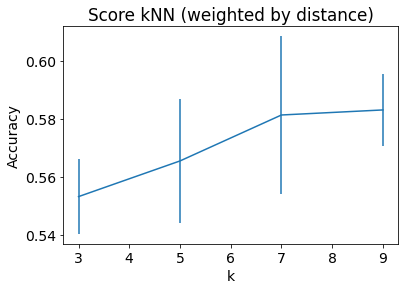

In [52]:
prec_tmp=[]
precision=[]
precision_err=[]
score_tmp=[]
score=[]
score_err=[]
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k, weights="distance")
    
    score_tmp=[]
    for train, test in kf.split(X):
        model.fit(X[train],Y[train])
        ypred = model.predict(X[test])
        #print(confusion_matrix(ypred,Y[test]))
        score_tmp.append(model.score(X[test],Y[test]))#accuracy score
    score.append(np.array(score_tmp).mean())
    score_err.append(np.array(score_tmp).std())
    
print(score)
print(score_err)

plt.errorbar(ks, score, yerr=score_err)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Score kNN (weighted by distance)")
plt.show()

#Skeane77 — Today at 11:35

file_names= ["ClassicRock_3Ho3iO0iJykgEQNbjB2sic.csv",\
             "ClassicalStudy_6wObnEPQ63a4kei1sEcMdH.csv",\
             "CountryHits_1mJhSx6aYQmINsZ8dG4gzU.csv",\
             "DanceHits_5oKz4DsTP8zbL97UIPbqp4.csv",\
             "HeavyMetalClassics_27gN69ebwiJRtXEboL12Ih.csv",\
             "HipHopClassics_5CRJExGSQFYXem2hT5GFkd.csv",\
             "JazzClassic_37i9dQZF1DXbITWG1ZJKYt.csv",\
             "KpopClassics_0jB4ANR4ox65etDMnxvGLp.csv"]


# Most convenient to set up dataframe with initial file, then systematically loop through the others
#Sticking with just the basic parameters for now
parameter_columns = [1,2,5,6,7,8,9, 19]#19 for songnames
nrows=200



#1 indexing here more natural
playlist_number=1
data = pd.read_csv(file_dir+file_names[playlist_number-1], usecols=parameter_columns, nrows=nrows)

playlist_numbers = playlist_number*np.ones(len(data))
data["playlist_number"]=playlist_numbers #Now has extra playlist column



# Now looping through the remaining filenames
for playlist_number in range(2,len(file_names)+1):
    # dtmp := Temporary dataframe, will append to df.data once data filtered and prepped
    dtmp= pd.read_csv(file_dir+file_names[playlist_number-1], usecols=parameter_columns, nrows=nrows)

    playlist_numbers = playlist_number*np.ones(len(dtmp)) # array of playlist_number
    dtmp["playlist_number"]=playlist_numbers #Now has extra playlist column
    data=data.append(dtmp, ignore_index=True) #Append back to main df.data
    
display(data)
print(data.duplicated().sum()) #prints number of duplicates
print(data.loc[data.duplicated(),:]) #prints rowof duplicate

# Polynomial Features


[0.5441910409432872, 0.554216871606132, 0.5593120528217445, 0.5615681569821157]
[0.021993753190504395, 0.026886990462387805, 0.02624435433103788, 0.0238049713345069]


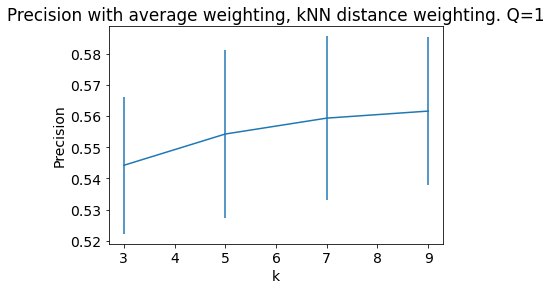

[0.5381992205722383, 0.5493460683873771, 0.5590153319758974, 0.5636888520993079]
[0.026455381981813218, 0.02300169319643153, 0.028351166493798204, 0.030206519674009835]


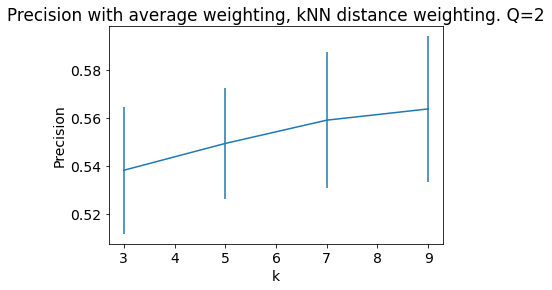

[0.5436919180987595, 0.5472901451642451, 0.5560199299620908, 0.5596340672349304]
[0.006609188716519633, 0.009103849631296184, 0.015630506529514435, 0.01848876475488793]


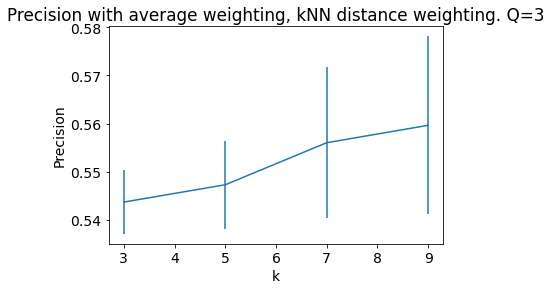

[0.544538097229931, 0.5546637068048149, 0.559229311738511, 0.5618341730449824]
[0.023031558923293657, 0.020830123300779314, 0.02218350736679437, 0.02052629399853423]


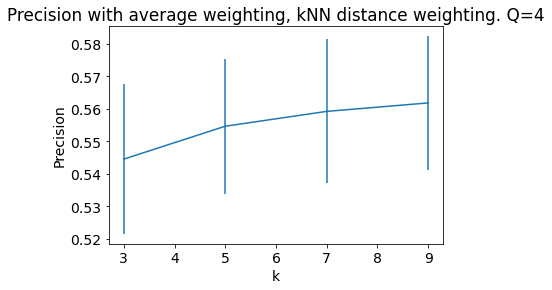

[0.545910574664305, 0.5513540258974308, 0.5572035903964304, 0.5630526177625776]
[0.015379214876604428, 0.012778119696380198, 0.018398986829008944, 0.020883697223161846]


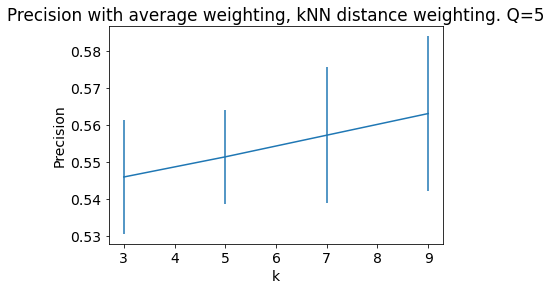

In [53]:
from sklearn.preprocessing import PolynomialFeatures
q_poly = [1,2,3,4,5]      

for q in q_poly:
    Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)
    tmp=[]
    precision=[]
    precision_err=[]
    for k in ks:
        model = KNeighborsClassifier(n_neighbors=k, weights="distance")
        for train, test in kf.split(Xpoly):
            model.fit(Xpoly[train],Y[train])
            ypred = model.predict(Xpoly[test])
            #print(confusion_matrix(ypred,Y[test]))

            tmp.append( precision_score(Y[test], ypred, average="weighted") )
            ## average = {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}

        precision.append( np.array(tmp).mean() )
        precision_err.append( np.array(tmp).std() )

    print(precision)
    print(precision_err)

    plt.errorbar(ks, precision, yerr=precision_err)
    plt.xlabel("k")
    plt.ylabel("Precision")
    plt.title("Precision with average weighting, kNN distance weighting. Q="+ str(q))
    plt.show()

# Linear Regression

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.6215650625384168, 0.6238803016685374, 0.6125956395036506, 0.617294637489384, 0.6191791506499773]
[0.02399363405890973, 0.026926855182818475, 0.00951839426654359, 0.02145372458379962, 0.04486898289639167]


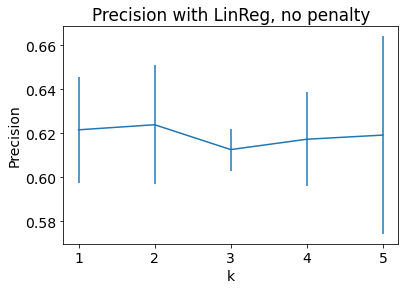

In [54]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(penalty = "none", max_iter=1e3)
#default solver="lbfgs"

LR_model.fit(X, Y)
################################

#from sklearn.preprocessing import PolynomialFeatures
q_poly = [1,2,3,4,5]      


precision=[]
precision_err=[]
for q in q_poly:
    Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)
    tmp=[]
    #for train, test in kf.split(Xpoly):
    for train, test in kf.split(Xpoly):
        LR_model.fit(Xpoly[train],Y[train])
        ypred = LR_model.predict(Xpoly[test])
        #print(confusion_matrix(ypred,Y[test]))

        tmp.append( precision_score(Y[test], ypred, average="weighted") )
        ## average = {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}

    precision.append( np.array(tmp).mean() )
    precision_err.append( np.array(tmp).std() )

print(precision)
print(precision_err)

plt.errorbar(q_poly, precision, yerr=precision_err)
plt.xlabel("k")
plt.ylabel("Precision")
plt.title("Precision with LinReg, no penalty")
plt.show()

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedM

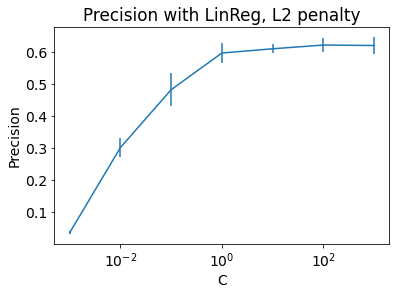

In [55]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(penalty = "l2",C=1, max_iter=1e4)

################################

#from sklearn.preprocessing import PolynomialFeatures
q_poly = [1,2,3,4,5]
#Cs = [0.01, 0.1, 1]
Cs = [0.001,0.01,0.1, 1, 10,100,1000]
q=3

precision=[]
precision_err=[]
for c in Cs:
    
    model = LogisticRegression(penalty = "l2",C=c, solver="lbfgs", max_iter=1e5)
    Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)
    tmp=[]
    #for train, test in kf.split(Xpoly):
    for train, test in kf.split(X):
        model.fit(X[train],Y[train])
        ypred = model.predict(X[test])
        #print(confusion_matrix(ypred,Y[test]))

        tmp.append( precision_score(Y[test], ypred, average="weighted") )
        ## average = {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}
    #print(tmp)
    precision.append( np.array(tmp).mean() )
    precision_err.append( np.array(tmp).std() )

#print(precision)
#print(precision_err)

plt.errorbar(Cs, precision, yerr=precision_err)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Precision")
plt.title("Precision with LinReg, L2 penalty")
plt.show()

# SVM Classification

In [26]:
#precision with averages
def my_precision( ytrue, ypred, classes): #classes = {1,2,...,n}
    if (len(ytrue) != len(ypred) ):
        print("Error. Not same dimensions")
        
    ny = len(ypred) #number of predicitions
    nc = len(classes)
    tp = np.zeros(nc)#true positives
    
    for j in range(ny):
        if (ytrue[j]==ypred[j]):
            tp[ int(ytrue[j]-1) ]+=1
        
    return (sum(tp)/ny) #average precision
    

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

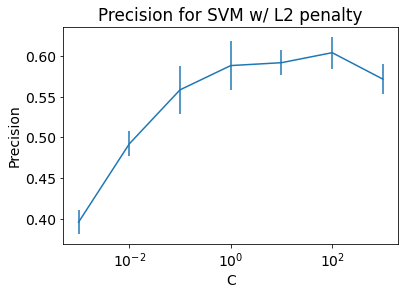

In [27]:
from sklearn.svm import LinearSVC
model = LinearSVC(C=c, max_iter=1E4)
classes=np.array([1,2,3,4,5,6,7,8])

################################

#from sklearn.preprocessing import PolynomialFeatures
q_poly = [1,2,3,4,5]
Cs = [0.001,0.01,0.1, 1, 10,100,1000]
#Cs = [0.01,0.1, 1, 10]
q=3

precision=[]
precision_err=[]
for c in Cs:
    model = LinearSVC(C=c, max_iter=1E4)
    #Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)
    tmp=[]
    #for train, test in kf.split(Xpoly):
    for train, test in kf.split(X):
        model.fit(X[train],Y[train])
        ypred = model.predict(X[test])
        #print(confusion_matrix(ypred,Y[test]))

        #Average weighting on precision
        tmp.append( my_precision(np.array(Y[test]), ypred, classes) )

    precision.append( np.array(tmp).mean() )
    precision_err.append( np.array(tmp).std() )


plt.errorbar(Cs, precision, yerr=precision_err)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Precision")
plt.title("Precision for SVM w/ L2 penalty")
plt.show()

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

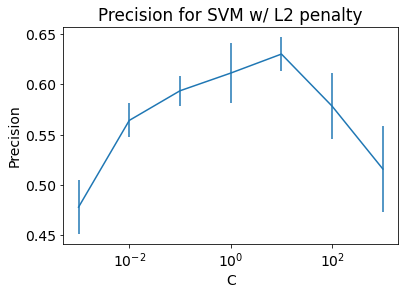

In [28]:
from sklearn.svm import LinearSVC
#model = LinearSVC(C=c, max_iter=1E3)


###################################


q_poly = [1,2,3,4,5]
Cs = [0.001,0.01,0.1, 1, 10,100,1000]
#Cs = [0.01,0.1, 1, 10]
q=3

precision=[]
precision_err=[]
for c in Cs:
    model = LinearSVC(C=c, max_iter=1E3)
    Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)
    tmp=[]
    #for train, test in kf.split(Xpoly):
    for train, test in kf.split(Xpoly):
        model.fit(Xpoly[train],Y[train])
        ypred = model.predict(Xpoly[test])
        #print(confusion_matrix(ypred,Y[test]))

        #Average weighting on precision
        tmp.append( my_precision(np.array(Y[test]), ypred, classes) )

    precision.append( np.array(tmp).mean() )
    precision_err.append( np.array(tmp).std() )


plt.errorbar(Cs, precision, yerr=precision_err)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Precision")
plt.title("Precision for SVM w/ L2 penalty")
plt.show()

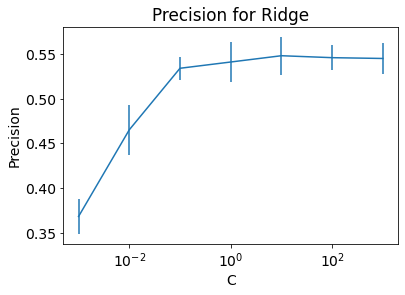

In [31]:
#from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier

################################

#from sklearn.preprocessing import PolynomialFeatures
q_poly = [1,2,3,4,5]
Cs = [0.001,0.01,0.1, 1, 10,100,1000]
q=3

precision=[]
precision_err=[]
for c in Cs:
    model = RidgeClassifier(alpha = 1/c )
    Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)
    tmp=[]
    #for train, test in kf.split(Xpoly):
    for train, test in kf.split(X):
        model.fit(X[train],Y[train])
        ypred = model.predict(X[test])
        #print(confusion_matrix(ypred,Y[test]))

        #Average weighting on precision
        tmp.append( my_precision(np.array(Y[test]), ypred, classes) )

    precision.append( np.array(tmp).mean() )
    precision_err.append( np.array(tmp).std() )


plt.errorbar(Cs, precision, yerr=precision_err)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Precision")
plt.title("Precision for Ridge")
plt.show()